# Option A - Data Challenge: Build a Banking Model - Analysis (1/3)
*Analytics for Financial Services - MBD02*
<br>
*Vilhelm Stiernstedt - 08/06/2018*


#### Inputs:
- challengeTrain.csv (18 columns)
- challengeTest.csv (17 columns without target, this is a blind dataset)

#### Variable descriptions:

1. **customerID** - Client unique identification - *character*
2. **sex** - Sex (Female, Male) - *factor*
3. **status** - Marital Status (Divorced, Married, Single, Unknown, Widower) - *factor*
4. **age** -  in years - *numeric*
5. **externalScore** - A score provided by third party about the risk of default - *numeric*
6. **indSimin** - A binary variable that indicates if the client has guarantors - *binary*
7. **indXlist** - A binary variable that indicates if the client has debts with official agencies published in public-registers - *binary*
8. **indCreditBureau** - A binary variable that indicates if the client appears in the delinquency list Credit Bureau - *binary*
9. **indInternet** - A binary variable that indicates if the client ask for information about credit cards online - *binary*
10. **indBadDebt** -  A binary variable that indicates whether the actual debt is classified as sub-standard or lower-quality risk - *binary*
11. **salary** - Salary in intervals: None, <650, 650-<1000, 1000-<1300, 1300-<1500, 1500-<2000, 2000-<3000, 3000-<5000, 5000-<8000, >8000, Unknown - *factor*
12. **numLoans** - Number of active loans that the client has in the bank - *numeric*
13. **numMortgages** - Number of active mortgages that the client has in the bank - *numeric*
14. **channel** - Channel for which the credit card has been contracted (App, Branch,Call Center, External Agent,Online, - Recovery, Unknown) - *factor*
15. **indBadLocation** - A binary varible indicanting if the client's adress is located in a low rent per capita zone - *binary*
16. **previous** - client debt classification of the previous year (Default, Normal, Refinancing, Restructuring, Unpaid) - *factor*
17. **sumExternalDefault** - The amount of money that the client's debts that are in default - *numeric*
18. **target** - A binary variable that indicates that the credit card fee has been unpaid - *binary*

#### Objective:
Build a classification model that can classify whether a credit card fee has been paid or not:
- 0 = paid credit card bills
- 1 = unpaid credit card bills

#### Steps:
- Read challengeTrain.csv
- Analyze Data
- Transform and Prepare Data
- Create a predictive model to estimate target
- Read challengeTest.csv
- Use model in challengeTest to estimate probability(variable prediction)
- Write challengeTest with new variable

#### Grading:
- 70% Global Rank with the formula:
    - Global rank using AUC metric over prediction variable in challengeTest.csv (as Kaggle competition)
    - points=70*(#alumns in Option A - position in rank +1)/#alumns in Option A
- 30% Deliverables quality:
    - Banking Analysis
    - Decision taken (reasons)
    - Conclusions (clear, simple)
    - Coding (clean, clear, simple, describe)
    - Business put in value
    - PPT Style

### Project Plan
In this first section we will conduct an univariate analysis for each feature, conduct a simple null imputation and build a baseline model. In the next section we will try to conduct a more sophisticated null imputation along with feature engineereing and transformation to optimize the data. In the last section we will set up a model pipeline and try a handful of various models and parameter tuning.

**Section 1** (this notebook)
1. Data Inspection
2. Univariate Analysis
3. Correlations
4. Baseline Models

**Section 2** (see Data Preparation Notebook)
1. Null Imputation
2. Outliers Treatment 
3. Feature Engineering

**Section 3** (see Modelling Notebook)
1. Model Preparation
2. Modelling
3. Evaluation
4. Submission

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# import data
train = pd.read_csv('challengeTrain.csv')
test = pd.read_csv('challengeTest.csv')

# set index - customerID
train.set_index('customerID', inplace=True)
test.set_index('customerID', inplace=True)

# combine train and test
all_data = train.append(test)

/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [3]:
# pandas settings
pd.set_option('display.max_columns', 100)

# suspend matplotlib warnings
warnings.filterwarnings("ignore")

# plot settings
%matplotlib inline

In [4]:
# functions definitions

# function to convert crosstab count as % 
def percConvert(x):
  return round(x/float(x[-1]), 3)

## 1. Data Inspection
- Dimensions 
- Data types
- Preview of dfs
- Numerical description
- Categorical description
- Missing Values (NaN)

### Dimensions

In [5]:
# dimensions train
train.shape

(522939, 17)

In [6]:
# dimensions test 
test.shape

(174313, 16)

### Data types

In [7]:
# train column names & dtypes
test.dtypes.sort_values()

indSimin                int64
indXlist                int64
indCreditBureau         int64
indInternet             int64
indBadDebt              int64
indBadLocation          int64
age                   float64
externalScore         float64
numLoans              float64
numMortgages          float64
sumExternalDefault    float64
sex                    object
status                 object
salary                 object
channel                object
previous               object
dtype: object

In [8]:
# train column names & dtypes -> target missing (ok)
test.dtypes.sort_values()

indSimin                int64
indXlist                int64
indCreditBureau         int64
indInternet             int64
indBadDebt              int64
indBadLocation          int64
age                   float64
externalScore         float64
numLoans              float64
numMortgages          float64
sumExternalDefault    float64
sex                    object
status                 object
salary                 object
channel                object
previous               object
dtype: object

### DataFrame Preview

In [9]:
# preview train df
train.head()

,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault,target
customerID,,,,,,,,,,,,,,,,,
D_00046780637,Female,Single,23.0,373.0,0,0,0,1,1,"[1000,1300)",NaN,NaN,External Agent,0,Normal,1173.46,1
D_00043828980,Male,Single,27.0,702.0,1,0,0,1,0,"[1500,2000)",1.0,0.0,External Agent,0,Restructuring,0.00,0
D_00043396577,Male,Single,28.0,728.0,0,0,0,1,0,"[1500,2000)",2.0,0.0,External Agent,0,Restructuring,0.00,1
D_00006768677,Male,Single,45.0,650.0,0,0,0,0,0,"[1000,1300)",1.0,0.0,Call Center,0,Unpaid,0.00,1
D_00062632001,Female,Unknown,NaN,625.0,0,0,0,1,0,"[650,1000)",NaN,NaN,External Agent,0,Normal,0.00,0


In [10]:
# preview test df
test.head()

,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault
customerID,,,,,,,,,,,,,,,,
D_00044539972,Female,Single,26.0,510.0,0,0,0,1,0,"[1300,1500)",NaN,NaN,Call Center,0,Normal,0.00
D_00074041049,Female,Single,20.0,739.0,0,0,0,1,0,<650,NaN,NaN,External Agent,0,Normal,0.00
D_00041998439,Male,Single,63.0,893.0,0,0,0,0,0,"[1300,1500)",1.0,0.0,Branch,0,Default,0.00
D_00041534199,Male,Single,32.0,734.0,0,0,0,0,0,"[1000,1300)",0.0,0.0,Call Center,1,Refinancing,0.00
D_00046605056,Male,Single,23.0,485.0,0,0,0,1,1,"[1300,1500)",1.0,0.0,External Agent,0,Restructuring,97.76


### Numerical Variables

In [11]:
# train df
train.describe()

,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,numLoans,numMortgages,indBadLocation,sumExternalDefault,target
count,500238.000000,514626.000000,522939.000000,522939.000000,522939.000000,522939.000000,522939.000000,267338.000000,267338.000000,522939.000000,5.202600e+05,522939.000000
mean,39.095415,591.346281,0.099002,0.053599,0.042443,0.775509,0.290831,1.203432,0.048665,0.168915,4.836326e+02,0.340265
std,13.952843,261.921840,0.298665,0.225225,0.201597,0.417247,0.454146,1.243055,0.220015,0.374677,1.084238e+04,0.473799
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,28.000000,458.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,37.000000,649.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,48.000000,791.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,3.409000e+01,1.000000
max,111.000000,995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,3.000000,1.000000,6.021214e+06,1.000000


#### notes:
- age -> 111 yrs -> quite old...
- numLoans -> 14 -> quite a few...

In [12]:
# test df
test.describe()

,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,numLoans,numMortgages,indBadLocation,sumExternalDefault
count,166841.000000,171556.000000,174313.000000,174313.000000,174313.000000,174313.000000,174313.000000,88934.000000,88934.000000,174313.000000,173438.000000
mean,39.067100,591.379421,0.098111,0.053719,0.042160,0.773614,0.290546,1.191018,0.047653,0.171444,465.633592
std,13.915189,261.521268,0.297465,0.225464,0.200954,0.418493,0.454016,1.236984,0.216852,0.376898,4979.476917
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,458.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,648.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,47.000000,791.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,35.130000
max,108.000000,995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,2.000000,1.000000,999586.200000


#### notes:
- similar values to training data -> good!

### Categorical Variables

In [13]:
train.select_dtypes(include=object).describe()

,sex,status,salary,channel,previous
count,522939,522939,522939,522939,522939
unique,2,5,11,7,5
top,Female,Single,"[1000,1300)",External Agent,Normal
freq,328048,430582,262168,270452,299673


In [14]:
test.select_dtypes(include=object).describe()

,sex,status,salary,channel,previous
count,174313,174313,174313,174313,174313
unique,2,5,11,7,5
top,Female,Single,"[1000,1300)",External Agent,Normal
freq,109476,143805,87566,90256,99871


#### notes:
- similar values to training data -> good!

### Missing Values

In [15]:
# inspect NaNs in train as %
round(train.isnull().sum() / len(train), 3)

sex                   0.000
status                0.000
age                   0.043
externalScore         0.016
indSimin              0.000
indXlist              0.000
indCreditBureau       0.000
indInternet           0.000
indBadDebt            0.000
salary                0.000
numLoans              0.489
numMortgages          0.489
channel               0.000
indBadLocation        0.000
previous              0.000
sumExternalDefault    0.005
target                0.000
dtype: float64

In [16]:
# inspect NaNs in test as %
round(test.isnull().sum() / len(test), 3)

sex                   0.000
status                0.000
age                   0.043
externalScore         0.016
indSimin              0.000
indXlist              0.000
indCreditBureau       0.000
indInternet           0.000
indBadDebt            0.000
salary                0.000
numLoans              0.490
numMortgages          0.490
channel               0.000
indBadLocation        0.000
previous              0.000
sumExternalDefault    0.005
dtype: float64

#### notes:
- same variables in train and test that have NaNs
- imputation to be conducted after univariate analysis

## 2. Univariate Analysis
In this section we will conduct an univariate analysis for each variable. We aim to realize the distrubution of each variable, its relationship with the target variable and other noteworthy characterstics or findings. 

**Variable Groups:**
- **target**
- **induviudal data**
  - sex
  - status
  - age

- **assets**
  - salary

- **liabillities**
  - numLoans
  - numMortgages

- **risk**
  - *binary*:
    - indSimin (have guarantors)
    - indXlist (debts with official agencies)
    - indBadLocation
    - indCreditBureau (crime)
    - indInternet (looking for credit card)
    - indBadDebt (type of debt sub-standard or lower-quality risk)
  - *numeric*:
    - sumExternalDefault (sum of debt in default)
    - externalScore
  - *factor*:
    - previous

- **sales**
  - channel

### Target

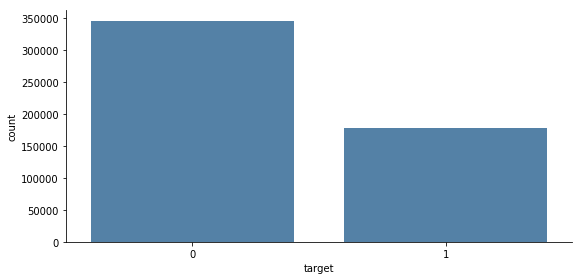

In [17]:
# Barplot to show distrubution of each level
sns.factorplot("target", data=train, aspect=2,
               kind="count", color='steelblue');

In [18]:
# level count as %
target = train.target.value_counts()
round(target / target.sum(), 3)

0    0.66
1    0.34
Name: target, dtype: float64

#### Notes
- 1/3 more paid than unpaid -> room for improvement
- unbalanced classification
- if we classify all data as 0, we should expect around 66%, aka any model lower than 66% is bad. 

### Induviudal data

### cutomerID - index

In [19]:
# inspect customerID types -> duplicates and different letter categories
train.index.value_counts().sort_values(ascending=False)

R_10406101156     15
R_10103274091     10
R_10418810039      9
R_10444921469      7
DR_00046183715     7
DR_00025756547     7
DR_00043434414     7
D_00040608129      7
R_10091536434      6
DR_00045151316     6
R_10422099765      6
DR_00042241594     6
D_00025785429      6
R_10424835159      5
R_10424109296      5
D_00080327172      5
R_10081346203      5
DR_00040128436     5
DR_00020429928     5
R_10295175635      4
DR_00040411806     4
D_00046344064      4
DR_00002766991     4
R_10428972614      4
DR_00043303875     4
D_00045737102      4
D_00010027032      4
DR_00040521408     4
R_10473698922      4
R_10416356161      4
                  ..
D_00010339476      1
D_00001332859      1
D_00043230358      1
D_00080632535      1
D_00045202438      1
D_00020042212      1
D_00040669984      1
D_00041216286      1
D_00042714641      1
D_00009152088      1
D_00047091195      1
D_00018186407      1
D_00042738786      1
D_00080281939      1
D_00029463805      1
D_00027301026      1
D_00046402782

#### customer type/class

In [20]:
# lets split index by _
train['customerID_class'] = train.index.str.split('_').str.get(0)

In [21]:
# value counts for new class
train['customerID_class'].value_counts()

D     510244
R       9318
DR      3377
Name: customerID_class, dtype: int64

In [22]:
# level with target proportions
pd.crosstab(train.customerID_class, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
customerID_class,,,
D,0.658,0.342,1.0
DR,0.653,0.347,1.0
R,0.734,0.266,1.0
All,0.660,0.340,1.0


#### duplicates

In [23]:
# how many duplicates?
# either going to indicate that customer holds multiple accounts or data entry error
len(train.index.get_duplicates())

10881

In [24]:
# see exmple for id: R_10406101156 with 15 accounts -> more or less the same
train.loc['R_10406101156']

,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault,target,customerID_class
customerID,,,,,,,,,,,,,,,,,,
R_10406101156,Female,Single,33.0,283.0,0,0,0,0,1,"[1000,1300)",NaN,NaN,Call Center,0,Unpaid,315.32,1,R
R_10406101156,Female,Single,33.0,283.0,1,0,0,1,1,"[1000,1300)",NaN,NaN,Call Center,0,Normal,315.32,1,R
R_10406101156,Female,Single,33.0,283.0,0,0,0,0,1,"[1000,1300)",NaN,NaN,Call Center,0,Unpaid,315.32,1,R
R_10406101156,Female,Single,33.0,283.0,0,0,0,0,1,"[1000,1300)",NaN,NaN,Call Center,0,Unpaid,315.32,1,R
R_10406101156,Female,Single,33.0,283.0,0,0,0,0,1,"[1000,1300)",NaN,NaN,Call Center,0,Unpaid,315.32,1,R
R_10406101156,Female,Single,33.0,283.0,0,0,0,0,1,"[1000,1300)",NaN,NaN,Call Center,0,Unpaid,315.32,1,R
R_10406101156,Female,Single,33.0,283.0,0,0,0,0,1,"[1000,1300)",NaN,NaN,Call Center,0,Unpaid,315.32,1,R
R_10406101156,Female,Single,33.0,283.0,0,0,0,0,1,"[1000,1300)",NaN,NaN,Call Center,0,Unpaid,315.32,1,R
R_10406101156,Female,Single,33.0,283.0,0,0,0,0,1,"[1000,1300)",NaN,NaN,Call Center,0,Unpaid,315.32,1,R


In [25]:
# lets other samples with duplicates
train.loc[train.index.get_duplicates()[1:10]]

,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault,target,customerID_class
customerID,,,,,,,,,,,,,,,,,,
D_00007764093,Male,Married,56.0,966.0,0,0,0,0,0,"[1500,2000)",1.0,0.0,Call Center,0,Refinancing,0.00,0,D
D_00007764093,Male,Married,56.0,966.0,0,0,0,0,0,"[1500,2000)",1.0,0.0,Call Center,0,Refinancing,0.00,0,D
D_00041664520,Female,Single,32.0,537.0,0,0,0,1,0,"[1000,1300)",NaN,NaN,Branch,0,Normal,0.00,0,D
D_00041664520,Female,Single,32.0,537.0,0,0,0,1,0,"[1000,1300)",NaN,NaN,Branch,0,Normal,0.00,1,D
D_00029488920,Male,Single,47.0,763.0,0,0,0,0,0,"[1000,1300)",1.0,0.0,Call Center,0,Refinancing,0.00,1,D
D_00029488920,Male,Single,47.0,763.0,0,0,0,1,0,"[1000,1300)",1.0,0.0,Online,0,Normal,0.00,1,D
D_00033265993,Female,Single,35.0,801.0,1,0,0,1,0,"[1300,1500)",NaN,NaN,Branch,1,Normal,0.00,0,D
D_00033265993,Female,Single,35.0,801.0,0,0,0,1,0,"[1300,1500)",NaN,NaN,Branch,1,Normal,0.00,1,D
D_00044450276,Female,Single,37.0,341.0,0,0,1,1,0,"[1500,2000)",1.0,0.0,External Agent,0,Normal,0.00,1,D


#### Notes
Sample cases suggest that most duplicated IDs are customer's with multiple accounts. On one occation the sex is different, maybe they offer a cuples account (even though singles). The same age and sumexternaldeafult score suggest that it might be some data entry error on the other hand.

In [26]:
# function that will compare duplicate ids and assess if target is equal for all accounts or not
# tolerated values
good_list = [0, 1]
# empyt list to add ids
flagged_ids = []

# loop over all duplicated ids
for id in train.index.get_duplicates():
    # if target is not same over all accounts append to list
    if train.loc[id].target.mean() not in good_list:
        flagged_ids.append(id)
        
# number of ids with contradiction target
len(flagged_ids)

3507

In [27]:
# inspect some samples -> what to do with these entries? What info differs? 
train.loc[flagged_ids[1:10]]

,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault,target,customerID_class
customerID,,,,,,,,,,,,,,,,,,
D_00041664520,Female,Single,32.0,537.0,0,0,0,1,0,"[1000,1300)",NaN,NaN,Branch,0,Normal,0.00,0,D
D_00041664520,Female,Single,32.0,537.0,0,0,0,1,0,"[1000,1300)",NaN,NaN,Branch,0,Normal,0.00,1,D
D_00033265993,Female,Single,35.0,801.0,1,0,0,1,0,"[1300,1500)",NaN,NaN,Branch,1,Normal,0.00,0,D
D_00033265993,Female,Single,35.0,801.0,0,0,0,1,0,"[1300,1500)",NaN,NaN,Branch,1,Normal,0.00,1,D
D_00044450276,Female,Single,37.0,341.0,0,0,1,1,0,"[1500,2000)",1.0,0.0,External Agent,0,Normal,0.00,1,D
D_00044450276,Female,Single,37.0,341.0,0,0,1,1,0,"[1500,2000)",1.0,0.0,Branch,0,Normal,0.00,0,D
D_00044878467,Male,Single,29.0,845.0,0,0,0,1,1,"[2000,3000)",0.0,0.0,Recovery,0,Normal,117.33,1,D
D_00044878467,Male,Single,29.0,845.0,0,0,0,1,1,"[2000,3000)",0.0,0.0,External Agent,0,Normal,117.33,0,D
D_00016624603,Male,Married,64.0,741.0,0,1,0,0,0,"[1500,2000)",2.0,0.0,External Agent,0,Refinancing,0.00,1,D


In [28]:
# function that will compare duplicate ids and assess if externalScore is very different
# empyt list to add ids
flagged_ids_extScore = []

# loop over all duplicated ids
for id in train.index.get_duplicates():
    # if target is not same over all accounts append to list
    if abs(train.loc[id].externalScore.max() - train.loc[id].externalScore.mean()) > 100:
        flagged_ids_extScore.append(id)
        
# number of ids with contradiction target
len(flagged_ids_extScore)

1339

In [29]:
# inspect some samples -> some inconsistent data for same ids, different sex, targets, sumExtDefault etc
# might be solid reason for this, minor data entry error
# however lets flags these as externalScore is going to be important
# create new feature
train.loc[flagged_ids_extScore[1:10]]

,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault,target,customerID_class
customerID,,,,,,,,,,,,,,,,,,
D_00045047365,Male,Single,26.0,704.0,1,0,0,1,1,"[1000,1300)",2.0,0.0,Call Center,1,Restructuring,24.76,0,D
D_00045047365,Female,Single,26.0,412.0,0,0,0,1,1,"[1000,1300)",NaN,NaN,External Agent,1,Normal,24.76,0,D
D_00040418753,Male,Single,35.0,634.0,0,0,0,1,0,"[1000,1300)",3.0,0.0,Branch,0,Normal,0.00,1,D
D_00040418753,Female,Single,35.0,161.0,0,0,0,1,0,"[1000,1300)",0.0,0.0,Branch,0,Normal,0.00,0,D
D_00042986753,Female,Single,28.0,550.0,0,0,0,1,0,"[1300,1500)",NaN,NaN,Call Center,0,Normal,0.00,1,D
D_00042986753,Female,Single,28.0,108.0,0,0,0,1,0,"[1300,1500)",1.0,0.0,Call Center,0,Normal,0.00,0,D
D_00041360825,Male,Single,32.0,599.0,0,0,0,1,1,"[2000,3000)",1.0,0.0,Call Center,0,Normal,612.97,0,D
D_00041360825,Male,Single,32.0,367.0,0,0,0,0,1,"[2000,3000)",1.0,0.0,Call Center,0,Refinancing,612.97,0,D
D_00025461385,Male,Single,54.0,543.0,0,1,0,0,1,"[1000,1300)",1.0,0.0,External Agent,1,Refinancing,234.37,1,D


In [30]:
# create new feature 
train['sameID_diff_extScore'] = 0
train['sameID_diff_extScore'].loc[flagged_ids_extScore] = 1

In [31]:
train['sameID_diff_extScore'].value_counts()

0    520228
1      2711
Name: sameID_diff_extScore, dtype: int64

In [32]:
# level with target proportion -> not much difference. but perhaps model can still seperate these accounts in some way.
pd.crosstab(train.sameID_diff_extScore, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
sameID_diff_extScore,,,
0,0.660,0.340,1.0
1,0.633,0.367,1.0
All,0.660,0.340,1.0


### sex

In [33]:
# level count as %
tmp_value_count = train.sex.value_counts()
round(tmp_value_count / tmp_value_count.sum(), 3)

Female    0.627
Male      0.373
Name: sex, dtype: float64

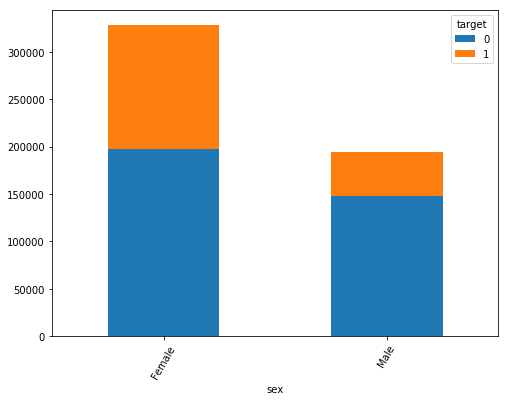

In [34]:
# stacked barplot with target
plot_df = train.groupby(['sex','target']).sex.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=60);

In [35]:
# level with target proportion 
pd.crosstab(train.sex, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
sex,,,
Female,0.602,0.398,1.0
Male,0.757,0.243,1.0
All,0.660,0.340,1.0


#### Notes
- More females customers
- Female 15% more unpaid cc fees compared to males

### status

In [36]:
# level count as %
tmp_value_count = train.status.value_counts()
round(tmp_value_count / tmp_value_count.sum(), 3)

Single      0.823
Married     0.131
Unknown     0.038
Widower     0.007
Divorced    0.001
Name: status, dtype: float64

In [37]:
# level count -> divoreced very little data
train.status.value_counts()

Single      430582
Married      68246
Unknown      20021
Widower       3798
Divorced       292
Name: status, dtype: int64

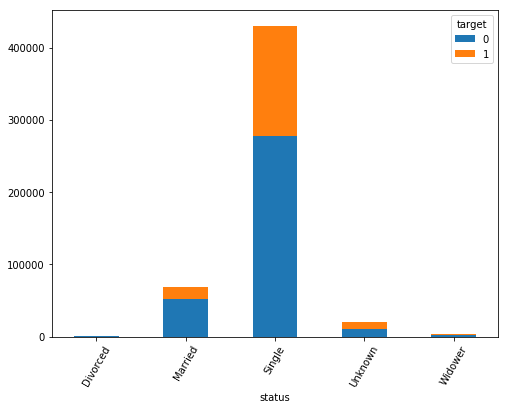

In [38]:
# stacked barplot with target
plot_df = train.groupby(['status','target']).status.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=60);

In [39]:
# level with target proportion 
pd.crosstab(train.status, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
status,,,
Divorced,0.733,0.267,1.0
Married,0.767,0.233,1.0
Single,0.647,0.353,1.0
Unknown,0.535,0.465,1.0
Widower,0.778,0.222,1.0
All,0.660,0.340,1.0


In [40]:
# level reduction
status_table = {'Widower': 'once_married',
                'Divorced': 'once_married',
                'Married': 'once_married'}

train['status_new'] = train.status.replace(status_table)

In [41]:
# level with target proportion 
pd.crosstab(train.status_new, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
status_new,,,
Single,0.647,0.353,1.0
Unknown,0.535,0.465,1.0
once_married,0.767,0.233,1.0
All,0.660,0.340,1.0


#### Notes
- 82% of customer single
- 3.8% of customers unknown status
- Singles 2nd worst at paying cc bills after unknown cat
- Widower best at paying bills close after married

FE Ideas:
- keep all levels as it is
- merge married and widower (similar split, similar life conditions)
- divorced very little data -> merge with married and widower

### age

In [42]:
# describe age
train.age.describe()

count    500238.000000
mean         39.095415
std          13.952843
min          18.000000
25%          28.000000
50%          37.000000
75%          48.000000
max         111.000000
Name: age, dtype: float64

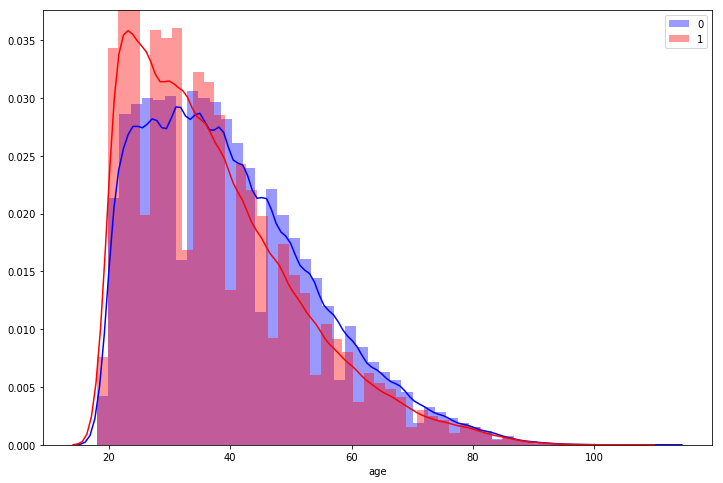

In [43]:
# histogram with age by target
plot_df = train[train.age.notnull()]

fig, ax = plt.subplots(figsize=(12, 8))

sns.distplot(plot_df[(plot_df.target == 0)].age,
             kde=True, color='b',
             label="0")

sns.distplot(plot_df[(plot_df.target == 1)].age,
             kde=True, color='r',
             label="1")

plt.legend();

In [48]:
# define arbitary age bins
train['age_arbbin'] = pd.cut(train.age, [18, 30, 40, 50, 60, 70, 150],
                             labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70+'],
                             right=False) 

# define age quartile bins -> good amount of data per level
train['age_qbin'] = pd.qcut(train.age, 4, precision=0)
# Q1: 18-28
# Q2: 29-<37
# Q3: 38-<48
# Q4: 49-

In [49]:
# arb age bin with target proportions
pd.crosstab(train.age_arbbin, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
age_arbbin,,,
18-29,0.604,0.396,1.0
40-49,0.660,0.340,1.0
NaN,NaN,NaN,NaN
50-59,0.426,0.164,1.0
60-69,0.350,0.135,1.0
30-39,0.404,0.165,1.0
All,0.664,0.336,1.0


In [71]:
# qurtile age bin with target proportions
#pd.crosstab(train.age_qbin, train.target, margins=True).apply(percConvert, axis=1)

#### Notes
- median customer age 37 years 
- only 25% older than 48 years
- 18-28 -> 40% unpaid cc fees
- 48-111 -> 28% unpaid cc fees

**FE:**
- quartile age bins seems good

**Null imputation:**
- mean / median / mode
- predictive model to assign age given: status, income, etc.

### Assets
### Salary

In [52]:
# value count
tmp_value_count = train.salary.value_counts().sort_values()
# round(tmp_value_count / tmp_value_count.sum(), 3)
tmp_value_count

Unknown          2446
>8000            3077
None             3474
[5000,8000)      7202
[3000,5000)     16882
<650            19606
[2000,3000)     38286
[650,1000)      53573
[1300,1500)     56244
[1500,2000)     59981
[1000,1300)    262168
Name: salary, dtype: int64

In [53]:
# recalssify salary levels to ordinal scale
salary_table = {'None': 0,
               '<650': 1,
               '[650,1000)': 2,
               '[1000,1300)': 3,
               '[1300,1500)': 4,
               '[1500,2000)': 5,
               '[2000,3000)': 6,
               '[3000,5000)': 7,
               '[5000,8000)': 8,
               '>8000': 9}

train['salary_ordinal'] = train.salary.replace(salary_table)

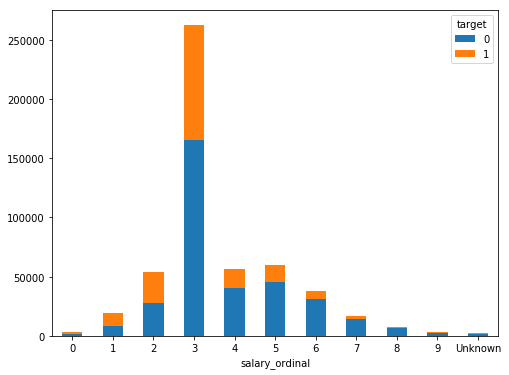

In [54]:
# stacked barplot with target
plot_df = train.groupby(['salary_ordinal','target']).status.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0);

In [72]:
# level with target proportion 
pd.crosstab(train.salary_ordinal, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
salary_ordinal,,,
0,0.546,0.454,1.0
1,0.413,0.587,1.0
2,0.525,0.475,1.0
3,0.630,0.370,1.0
4,0.711,0.289,1.0
5,0.760,0.240,1.0
6,0.805,0.195,1.0
7,0.842,0.158,1.0
8,0.875,0.125,1.0


In [73]:
# define binning for ordinal scale
salary_reduction_table = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2, 6: 3, 7: 3, 8: 4, 9: 4}
# execute binning                          
train['salary_ordinal_bins'] = train.salary_ordinal.replace(salary_reduction_table)

In [74]:
# value count -> fair amount of data per level
train.salary_ordinal_bins.value_counts().sort_values()

Unknown      2446
4           10279
3           55168
0           76653
2          116225
1          262168
Name: salary_ordinal_bins, dtype: int64

In [75]:
# level with target proportion 
pd.crosstab(train.salary_ordinal_bins, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
salary_ordinal_bins,,,
0,0.497,0.503,1.0
1,0.630,0.370,1.0
2,0.737,0.263,1.0
3,0.816,0.184,1.0
4,0.884,0.116,1.0
Unknown,0.776,0.224,1.0
All,0.660,0.340,1.0


#### Notes
- median customer has a salary between 1000-1300
- no salary has less unpaid cc fess compared to first salary level <650
- as salary increase proportion of unpiad cc fees decrease
- unknown salary level have similar cc fees split as 5/6

FE:
- ordinal salary level good start
- perhaps shrink levels eg. 5, merge similar levels

### Liabillities
### numLoans

In [76]:
# value count
train.numLoans.value_counts().sort_values()

14.0        1
9.0         9
8.0        52
7.0       245
6.0      1117
5.0      3798
4.0     10313
3.0     23239
2.0     45921
1.0     90994
0.0     91649
Name: numLoans, dtype: int64

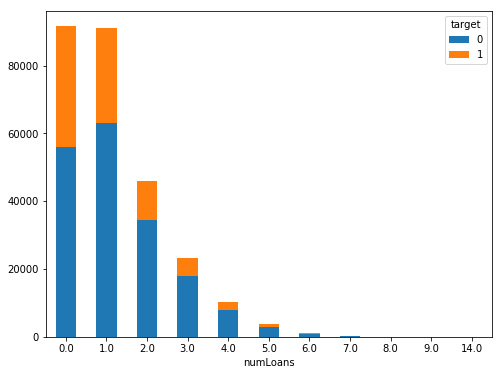

In [77]:
# stacked barplot with target
plot_df = train.groupby(['numLoans','target']).status.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0);

In [78]:
# levels with target proportions
pd.crosstab(train.numLoans, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
numLoans,,,
0.0,0.611,0.389,1.0
1.0,0.692,0.308,1.0
2.0,0.747,0.253,1.0
3.0,0.767,0.233,1.0
4.0,0.776,0.224,1.0
5.0,0.778,0.222,1.0
6.0,0.795,0.205,1.0
7.0,0.767,0.233,1.0
8.0,0.865,0.135,1.0


In [79]:
# numLoans - define arbitary bins
train['numLoans_bins'] = pd.cut(train.numLoans, [0, 1, 2, 3, 5, 100],
                             right=False)

In [80]:
# value count -> good amount of data for each bin
tmp_value_count = train.numLoans_bins.value_counts().sort_values()
tmp_value_count #/ tmp_value_count.sum(), 6)

[5, 100)     5222
[3, 5)      33552
[2, 3)      45921
[1, 2)      90994
[0, 1)      91649
Name: numLoans_bins, dtype: int64

In [83]:
# levels with target proportions
#pd.crosstab(train.numLoans_bins, train.target, margins=True).apply(percConvert, axis=1)

#### Notes
- majority of customers have 0 or 1 loans
- no loan customers have highest proportion of unpaid cc fees. perhaps risk level high, thus no loans given. inability to pay cc fees.
- has more number loans are granted, the proportion of unpaid fees decrease. 
- at 9 and 14 loans, trend change, however very few data points. perhaps too many acould indicate solvancy issues
- from 5 loans and up, very little data

FE:
- bin to shrink number of levels, should be possible as many groups have similar target propotions.
- remove low count levels, merge with best level

Null Imputation:
- 49% missing values
- assume 0 loans
- mean / median / mode
- predictive model?
- grouping

### numMortgages

In [84]:
# value count
train.numMortgages.value_counts().sort_values()

3.0        10
2.0       252
1.0     12476
0.0    254600
Name: numMortgages, dtype: int64

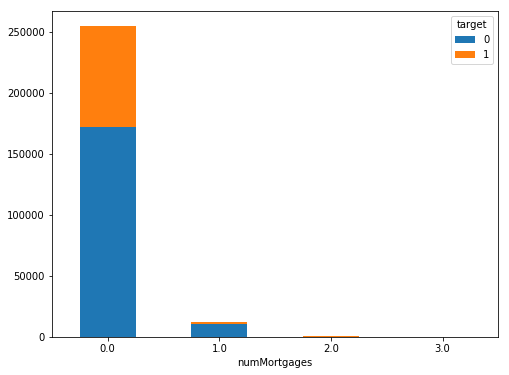

In [85]:
# stacked barplot with target
plot_df = train.groupby(['numMortgages','target']).status.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0);

In [86]:
# levels with target proportions
pd.crosstab(train.numMortgages, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
numMortgages,,,
0.0,0.676,0.324,1.0
1.0,0.872,0.128,1.0
2.0,0.905,0.095,1.0
3.0,0.800,0.200,1.0
All,0.686,0.314,1.0


In [87]:
# define binary bin
train['numMortgages_binary'] = pd.cut(train.numMortgages, [0, 1, 100], right=False)

In [88]:
# value count for new bins -> better than before
tmp_value_count = train.numMortgages_binary.value_counts().sort_values()
tmp_value_count #/ tmp_value_count.sum(), 5)

[1, 100)     12738
[0, 1)      254600
Name: numMortgages_binary, dtype: int64

In [90]:
# levels with target proportions
#pd.crosstab(train.numMortgages_binary, train.target, margins=True).apply(percConvert, axis=1)

#### Notes
- 95% of customers have no mortage
- The 5% that have mortages, significantly lower proportion of unpaid cc fees
- very little data with for 2 or more mortgages

FE:
- remove low count levels, not enough data, cast as unknown or merge

Null Imputation:
- 49% missing values
- assume 0 mortgages
- mean / median / mode
- predictive model?
- grouping

### Risk
### indSimin (customer have guarantors)

In [91]:
# value count as %
tmp_value_count = train.indSimin.value_counts().sort_values()
round(tmp_value_count / tmp_value_count.sum(), 5)

1    0.099
0    0.901
Name: indSimin, dtype: float64

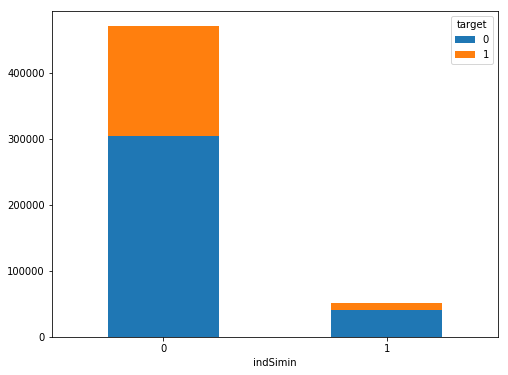

In [92]:
# stacked barplot with target
plot_df = train.groupby(['indSimin','target']).status.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0);

In [93]:
# levels with target proportions
pd.crosstab(train.indSimin, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
indSimin,,,
0,0.647,0.353,1.0
1,0.776,0.224,1.0
All,0.660,0.340,1.0


In [94]:
# levels with numLoans proportions
pd.crosstab(train.indSimin, train.numLoans, margins=True).apply(percConvert, axis=1)

numLoans,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,14.0,All
indSimin,,,,,,,,,,,,
0,0.350,0.341,0.169,0.084,0.037,0.014,0.004,0.001,0.0,0.0,0.0,1.0
1,0.286,0.333,0.196,0.108,0.050,0.019,0.006,0.001,0.0,0.0,0.0,1.0
All,0.343,0.340,0.172,0.087,0.039,0.014,0.004,0.001,0.0,0.0,0.0,1.0


In [95]:
# levels against numMortgages
pd.crosstab(train.indSimin, train.numMortgages, margins=True).apply(percConvert, axis=1)

numMortgages,0.0,1.0,2.0,3.0,All
indSimin,,,,,
0,0.953,0.046,0.001,0.0,1.0
1,0.949,0.050,0.001,0.0,1.0
All,0.952,0.047,0.001,0.0,1.0


#### Notes
- 90% of customers don't have a gurantor
- Customer with a gurantor have 13% lower proportion of unpaid cc fees, perhaps due to being trustworthy induviduals that friends / family / bank can trust
- Gurantor customers don't seem have enables more loans

FE:
- good as it is?

### indXlist (debts with official agencies)

In [96]:
# value count as %
tmp_value_count = train.indXlist.value_counts().sort_values()
round(tmp_value_count / tmp_value_count.sum(), 5)

1    0.0536
0    0.9464
Name: indXlist, dtype: float64

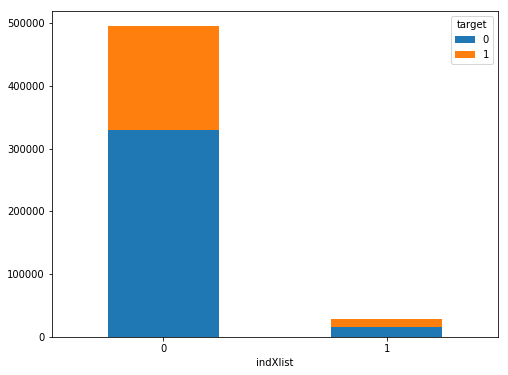

In [97]:
# stacked barplot with target
plot_df = train.groupby(['indXlist','target']).status.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0);

In [98]:
# levels with target proportions
pd.crosstab(train.indXlist, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
indXlist,,,
0,0.667,0.333,1.0
1,0.536,0.464,1.0
All,0.660,0.340,1.0


#### Notes
- 95% of customers don't have a debt registred with  official agencies
- Customer that have debt registred have 13% higher proportion of unpaid cc fees

FE:
- good as it is?

### indBadLocation

In [99]:
# value count as %
tmp_value_count = train.indBadLocation.value_counts().sort_values()
round(tmp_value_count / tmp_value_count.sum(), 5)

1    0.16891
0    0.83109
Name: indBadLocation, dtype: float64

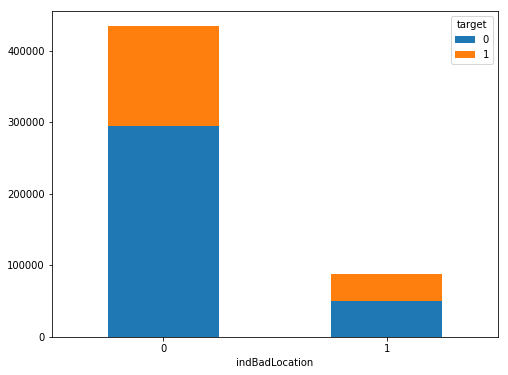

In [100]:
# stacked barplot with target
plot_df = train.groupby(['indBadLocation','target']).status.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0);

In [101]:
# levels with target proportions
pd.crosstab(train.indBadLocation, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
indBadLocation,,,
0,0.677,0.323,1.0
1,0.574,0.426,1.0
All,0.660,0.340,1.0


#### Notes
- 83% of customers don't leave in an established bad location area
- Customer that do live in a bad location have 10% higher proportion of unpaid cc fees

FE:
- good as it is?
- merge with other binary risk elements to use less variables, perhaps benefital for some types of models

### indInternet (looking for credit card)

In [102]:
# value count as %
indInternet = train.indInternet.value_counts().sort_values()
round(indInternet / indInternet.sum(), 5)

0    0.22449
1    0.77551
Name: indInternet, dtype: float64

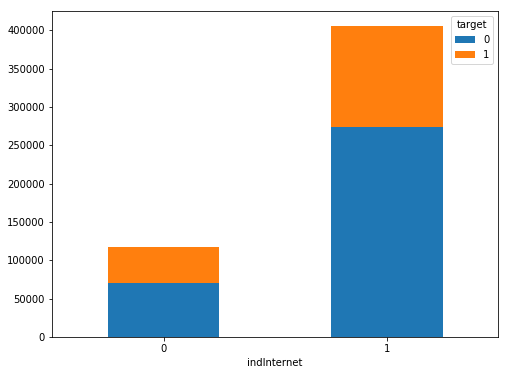

In [103]:
# stacked barplot with target
plot_df = train.groupby(['indInternet','target']).status.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0);

In [104]:
# levels with target proportions
pd.crosstab(train.indInternet, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
indInternet,,,
0,0.603,0.397,1.0
1,0.676,0.324,1.0
All,0.660,0.340,1.0


#### Notes
- 77% of customers have asked for information about credit cards online.
- Customers that hasn't requested such information, do however, have a hihger proportion of unpaid cc fees.

FE:
- good as it is?
- maybe drop variable?

### indBadDebt (type of debt sub-standard or lower-quality risk)

In [105]:
# value count as %
tmp_val_count = train.indBadDebt.value_counts().sort_values()
round(tmp_val_count / tmp_val_count.sum(), 5)

1    0.29083
0    0.70917
Name: indBadDebt, dtype: float64

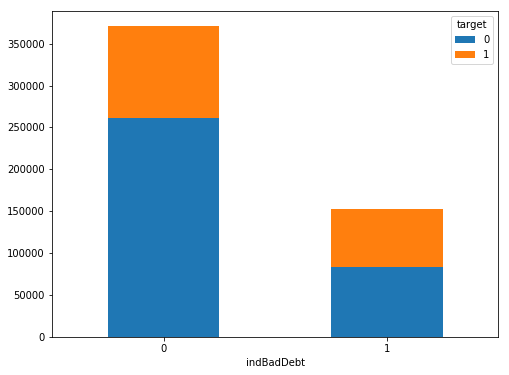

In [106]:
# stacked barplot with target
plot_df = train.groupby(['indBadDebt','target']).status.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0);

In [107]:
# levels with target proportions
pd.crosstab(train.indBadDebt, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
indBadDebt,,,
0,0.705,0.295,1.0
1,0.550,0.450,1.0
All,0.660,0.340,1.0


#### Notes
- 71% of customers don't have a type of sub-standard or lower-quality risk debt. 
- Customers that has it have 15% higher proportion of unpaid cc fees. 

FE:
- good as it is?

### sumExternalDefault (sum of debt in default)

In [108]:
# description
train.sumExternalDefault.describe().apply(lambda x: format(x, 'f'))

count     520260.000000
mean         483.632581
std        10842.380872
min            0.000000
25%            0.000000
50%            0.000000
75%           34.090000
max      6021214.210000
Name: sumExternalDefault, dtype: object

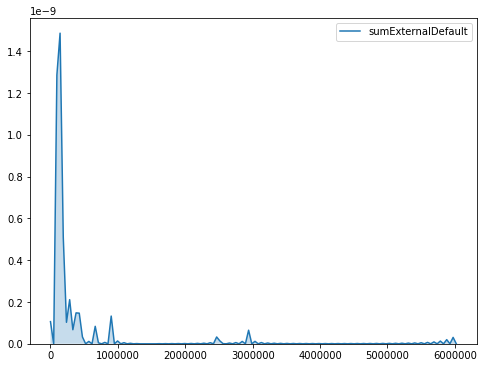

In [109]:
# KDEplot to see distrubution
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(train['sumExternalDefault'], shade=True);

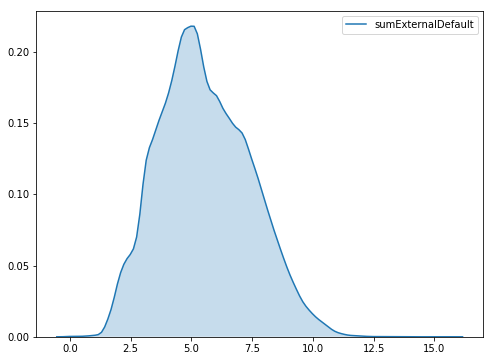

In [110]:
# KDEplot to see distrubution - log
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(np.log(train['sumExternalDefault']), shade=True);

In [111]:
# see top 10 values 
train.sumExternalDefault.value_counts().nlargest(10)

0.00      368173
426.20       300
20.00        296
5.00         241
6.54         170
10.00        170
8.96         159
4.96         147
368.20       137
421.40       128
Name: sumExternalDefault, dtype: int64

In [112]:
# define arbitary bins
train['sumExternalDefault_arbbin'] = pd.cut(train.sumExternalDefault,
                                            [0, 1, 100, 250, 500, 100000000],
                                            right=False) 
# define binary bins
train['sumExternalDefault_binarybin'] = pd.cut(train.sumExternalDefault,
                                            [0, 1, 100000000],
                                            right=False) 

In [113]:
# value count arbitary binning
train.sumExternalDefault_arbbin.value_counts()

[0, 1)              368173
[500, 100000000)     53405
[1, 100)             50623
[100, 250)           29937
[250, 500)           18122
Name: sumExternalDefault_arbbin, dtype: int64

In [114]:
# value count binnary binning
train.sumExternalDefault_binarybin.value_counts()

[0, 1)            368173
[1, 100000000)    152087
Name: sumExternalDefault_binarybin, dtype: int64

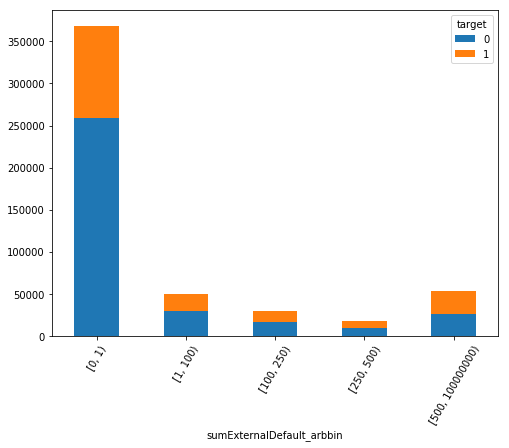

In [115]:
# stacked barplot with target
plot_df = train.groupby(['sumExternalDefault_arbbin','target']).status.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=60);

In [116]:
# arb bins with target proportions
pd.crosstab(train.sumExternalDefault_arbbin, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
sumExternalDefault_arbbin,,,
"[500, 100000000)",0.704,0.296,1.0
"[0, 1)",0.608,0.392,1.0
"[250, 500)",0.564,0.436,1.0
"[1, 100)",0.525,0.475,1.0
"[100, 250)",0.494,0.506,1.0
All,0.659,0.341,1.0


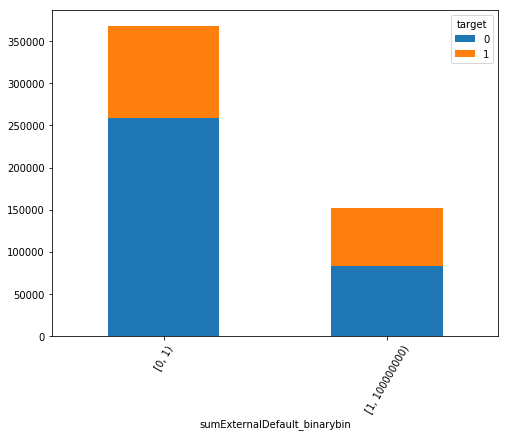

In [117]:
# stacked barplot with target
plot_df = train.groupby(['sumExternalDefault_binarybin','target']).status.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=60);

In [118]:
# binary bins with target proportions
pd.crosstab(train.sumExternalDefault_binarybin, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
sumExternalDefault_binarybin,,,
"[1, 100000000)",0.704,0.296,1.0
"[0, 1)",0.550,0.450,1.0
All,0.659,0.341,1.0


#### Notes
- 71% of customers don't have any external debt.
- Customers that has espacilly between 100-100K have 12%< higher proportion unpaid cc fees compared to the average.

FE:
- binning
- merge levels -> what levels?

Missing values:
- mean / median / mode = 0
- assume NaN is 0
- make predictions?
- drop rows (0.5% of tot)

### externalScore

In [119]:
# describe 
train.externalScore.describe()

count    514626.000000
mean        591.346281
std         261.921840
min           1.000000
25%         458.000000
50%         649.000000
75%         791.000000
max         995.000000
Name: externalScore, dtype: float64

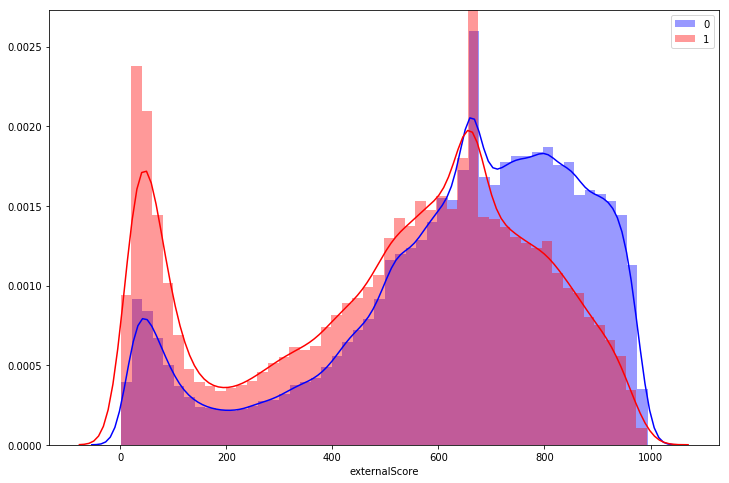

In [120]:
# distrubution by target
plot_df = train[train.externalScore.notnull()]

fig, ax = plt.subplots(figsize=(12, 8))

sns.distplot(plot_df[(plot_df.target == 0)].externalScore,
             kde=True, color='b',
             label="0")

sns.distplot(plot_df[(plot_df.target == 1)].externalScore,
             kde=True, color='r',
             label="1")

plt.legend();

#### Log

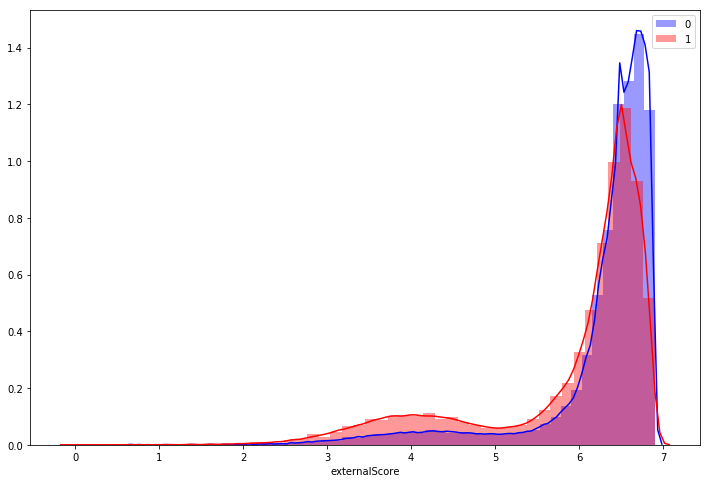

In [121]:
# distrubution by target -> log
plot_df = train[train.externalScore.notnull()]

fig, ax = plt.subplots(figsize=(12, 8))

sns.distplot(np.log(plot_df[(plot_df.target == 0)].externalScore),
             kde=True, color='b',
             label="0")

sns.distplot(np.log(plot_df[(plot_df.target == 1)].externalScore),
             kde=True, color='r',
             label="1")

plt.legend();

#### Sqrt

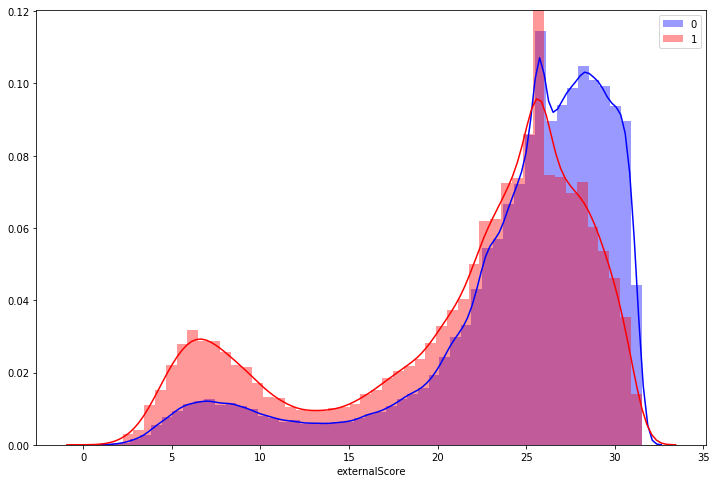

In [122]:
# distrubution by target -> log
plot_df = train[train.externalScore.notnull()]

fig, ax = plt.subplots(figsize=(12, 8))

sns.distplot(np.sqrt(plot_df[(plot_df.target == 0)].externalScore),
             kde=True, color='b',
             label="0")

sns.distplot(np.sqrt(plot_df[(plot_df.target == 1)].externalScore),
             kde=True, color='r',
             label="1")

plt.legend();

In [123]:
# define 8 quartile bins
train['externalScore_qbin'] = pd.qcut(train.externalScore, 8, precision=0)

In [124]:
# quartiles bins with target proportions
pd.crosstab(train.externalScore_qbin, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
externalScore_qbin,,,
"(182.0, 458.0]",0.469,0.531,1.0
"(649.0, 714.0]",0.560,0.440,1.0
"(714.0, 791.0]",0.625,0.375,1.0
"(569.0, 649.0]",0.648,0.352,1.0
"(458.0, 569.0]",0.669,0.331,1.0
"(791.0, 872.0]",0.727,0.273,1.0
"(872.0, 995.0]",0.759,0.241,1.0
"(0.0, 182.0]",0.824,0.176,1.0
All,0.660,0.340,1.0


In [125]:
# define arbitary binning based on qurtile binning
train['externalScore_arbbin'] = pd.cut(train.externalScore,
                                       [0, 182, 458, 649, 872, 1000],
                                       right=False)

In [126]:
# arbitary bins with target proportions
pd.crosstab(train.externalScore_arbbin, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
externalScore_arbbin,,,
"[182, 458)",0.469,0.531,1.0
"[649, 872)",0.560,0.440,1.0
"[458, 649)",0.637,0.363,1.0
"[872, 1000)",0.718,0.282,1.0
"[0, 182)",0.823,0.177,1.0
All,0.660,0.340,1.0


#### Notes
- Average customer have score around 650.
- Clear relationship between external score and probability of unpaid cc fees. High score lower chance, q4 only 1in5 have unpaid compared to almost 1/2 if score in 1.

FE:
- binning -> qurtile or better arbitary?

Missing values:
- mean / median / mode
- assume NaN is 0
- make predictions?
- drop rows (1.6% of tot)

### previous (client debt classification of the previous year)

In [127]:
# value count as %
tmp_val_count = train.previous.value_counts().sort_values()
round(tmp_val_count / tmp_val_count.sum(), 5)
# tmp_val_count

Unpaid           0.03509
Default          0.03529
Refinancing      0.15411
Restructuring    0.20245
Normal           0.57306
Name: previous, dtype: float64

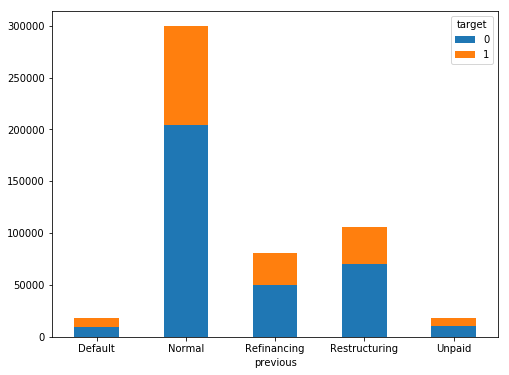

In [128]:
# stacked barplot with target
plot_df = train.groupby(['previous','target']).status.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0);

In [129]:
# levels with target proportions
pd.crosstab(train.previous, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
previous,,,
Default,0.527,0.473,1.0
Normal,0.681,0.319,1.0
Refinancing,0.625,0.375,1.0
Restructuring,0.662,0.338,1.0
Unpaid,0.583,0.417,1.0
All,0.660,0.340,1.0


#### Notes
- 56% of customers have a normal debt classification from last year.
- 20% did some restructuering, whilst 15% did some refinancing
- Customer that defaulted have very high (47.5%) proportion of unpaid cc fees, followed by unpaid debt 8% higher than the average of 34%.

FE:
- lower number of levels?
    - normal
    - Refinancing + resturctering
    - defualt + unpaid

### Sales
### channel

In [130]:
# value count as %
tmp_val_count = train.channel.value_counts().sort_values()
round(tmp_val_count / tmp_val_count.sum(), 5)

Unknown           0.00589
Online            0.02377
App               0.03821
Recovery          0.09425
Call Center       0.15494
Branch            0.16576
External Agent    0.51718
Name: channel, dtype: float64

In [131]:
# value count
train.channel.value_counts().sort_values()

Unknown             3081
Online             12432
App                19982
Recovery           49289
Call Center        81022
Branch             86681
External Agent    270452
Name: channel, dtype: int64

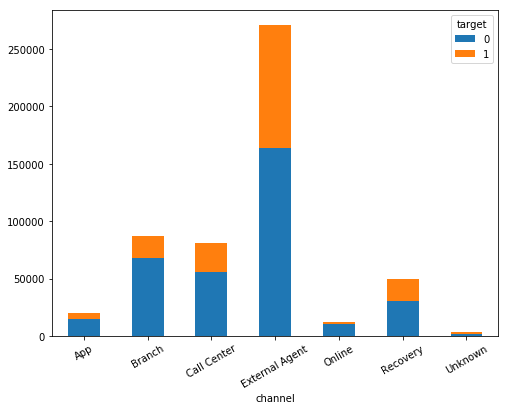

In [132]:
# stacked barplot with target
plot_df = train.groupby(['channel','target']).status.count().unstack()
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=30);

In [133]:
# levels with target proportions
pd.crosstab(train.channel, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
channel,,,
App,0.751,0.249,1.0
Branch,0.785,0.215,1.0
Call Center,0.682,0.318,1.0
External Agent,0.606,0.394,1.0
Online,0.815,0.185,1.0
Recovery,0.625,0.375,1.0
Unknown,0.630,0.370,1.0
All,0.660,0.340,1.0


In [134]:
# recalssify salary levels to ordinal scale
channel_table = {'Recovery': 'Recovery_Unknown',
                 'Unknown': 'Recovery_Unknown'}

train['channel_new'] = train.channel.replace(channel_table)

In [135]:
# levels with target proportions
pd.crosstab(train.channel_new, train.target, margins=True).apply(percConvert, axis=1)

target,0,1,All
channel_new,,,
App,0.751,0.249,1.0
Branch,0.785,0.215,1.0
Call Center,0.682,0.318,1.0
External Agent,0.606,0.394,1.0
Online,0.815,0.185,1.0
Recovery_Unknown,0.626,0.374,1.0
All,0.660,0.340,1.0


In [136]:
# value count as %
train.channel_new.value_counts().sort_values()

Online               12432
App                  19982
Recovery_Unknown     52370
Call Center          81022
Branch               86681
External Agent      270452
Name: channel_new, dtype: int64

#### Notes
- External Agent braught in 52% of customers.
- Those customers also have the highest proportion of unpaid cc fees, 39%. Perhaps agents have the wrong incentives, quantity before quality.
- Online and App seem to have the harshest entry requirements, perhaps if they fail their rerouted to an agent or call center.

FE:
- lower number of levels?
- binning:
    - online + app + branch 
    - Call center
    - agents + recovery + unknown

## 3. Multivariate Analysis

### Correlations

#### Pearson

In [137]:
# correlation with all numerical variables
corr_vars = all_data.corr()
corr_vars

,age,externalScore,indBadDebt,indBadLocation,indCreditBureau,indInternet,indSimin,indXlist,numLoans,numMortgages,sumExternalDefault,target
age,1.000000,0.331285,-0.046288,0.009776,0.025479,-0.060746,0.211561,0.036427,0.075315,0.012740,0.008339,-0.089086
externalScore,0.331285,1.000000,-0.492506,-0.039584,-0.217962,0.018103,0.105577,-0.048583,0.075361,0.107745,-0.075513,-0.223701
indBadDebt,-0.046288,-0.492506,1.000000,0.053330,0.170173,-0.002332,-0.023592,0.023673,-0.083233,-0.058454,0.076756,0.148744
indBadLocation,0.009776,-0.039584,0.053330,1.000000,-0.013607,-0.005056,0.010833,0.019072,0.000573,-0.043050,0.002653,0.081940
indCreditBureau,0.025479,-0.217962,0.170173,-0.013607,1.000000,-0.011265,-0.004208,0.023342,-0.097643,-0.018544,0.070189,0.046824
indInternet,-0.060746,0.018103,-0.002332,-0.005056,-0.011265,1.000000,0.137972,-0.441848,0.038634,0.013789,-0.003481,-0.064515
indSimin,0.211561,0.105577,-0.023592,0.010833,-0.004208,0.137972,1.000000,-0.078811,0.054391,0.005370,-0.000701,-0.081625
indXlist,0.036427,-0.048583,0.023673,0.019072,0.023342,-0.441848,-0.078811,1.000000,-0.038009,-0.028379,0.005180,0.062213
numLoans,0.075315,0.075361,-0.083233,0.000573,-0.097643,0.038634,0.054391,-0.038009,1.000000,0.071945,-0.015665,-0.119378
numMortgages,0.012740,0.107745,-0.058454,-0.043050,-0.018544,0.013789,0.005370,-0.028379,0.071945,1.000000,0.000467,-0.089136


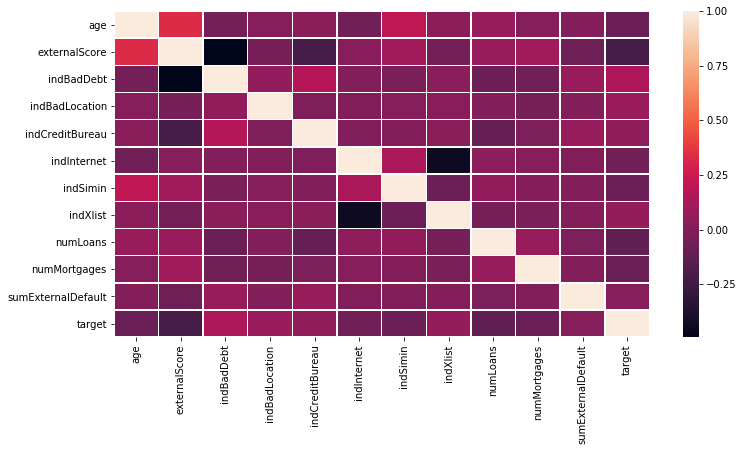

In [138]:
# heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_vars, 
            xticklabels=corr_vars.columns,
            yticklabels=corr_vars.columns,
            linewidths=.5);

#### Spearman
Non-linear correlations.

In [139]:
# correlation with all numerical variables
corr_vars_sp = all_data.corr(method='spearman')
corr_vars_sp

,age,externalScore,indBadDebt,indBadLocation,indCreditBureau,indInternet,indSimin,indXlist,numLoans,numMortgages,sumExternalDefault,target
age,1.000000,0.405715,-0.025217,0.008744,0.044867,-0.047440,0.190551,0.027084,0.078166,0.028306,-0.016511,-0.098283
externalScore,0.405715,1.000000,-0.457073,-0.028679,-0.177120,0.014057,0.130402,-0.044470,0.052121,0.103669,-0.483122,-0.223119
indBadDebt,-0.025217,-0.457073,1.000000,0.053330,0.170173,-0.002332,-0.023592,0.023673,-0.106772,-0.058988,0.980474,0.148744
indBadLocation,0.008744,-0.028679,0.053330,1.000000,-0.013607,-0.005056,0.010833,0.019072,0.000940,-0.043647,0.053078,0.081940
indCreditBureau,0.044867,-0.177120,0.170173,-0.013607,1.000000,-0.011265,-0.004208,0.023342,-0.117913,-0.019006,0.205813,0.046824
indInternet,-0.047440,0.014057,-0.002332,-0.005056,-0.011265,1.000000,0.137972,-0.441848,0.041767,0.013737,-0.006731,-0.064515
indSimin,0.190551,0.130402,-0.023592,0.010833,-0.004208,0.137972,1.000000,-0.078811,0.055174,0.005375,-0.022405,-0.081625
indXlist,0.027084,-0.044470,0.023673,0.019072,0.023342,-0.441848,-0.078811,1.000000,-0.044153,-0.028469,0.031058,0.062213
numLoans,0.078166,0.052121,-0.106772,0.000940,-0.117913,0.041767,0.055174,-0.044153,1.000000,0.067205,-0.129286,-0.129442
numMortgages,0.028306,0.103669,-0.058988,-0.043647,-0.019006,0.013737,0.005375,-0.028469,0.067205,1.000000,-0.061085,-0.089898


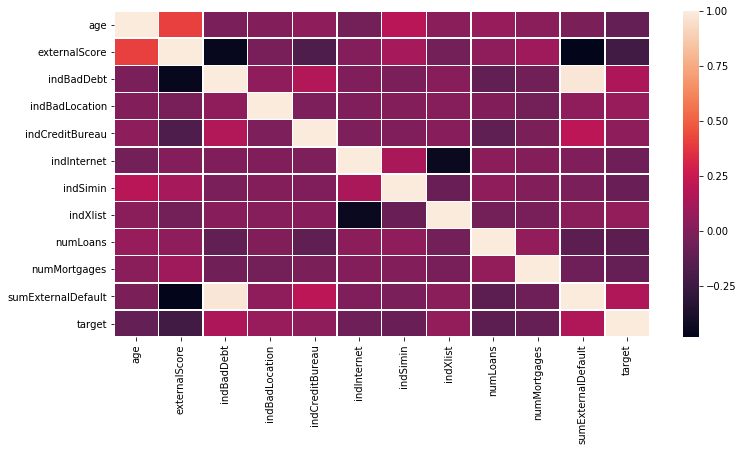

In [140]:
# heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_vars_sp, 
            xticklabels=corr_vars_sp.columns,
            yticklabels=corr_vars_sp.columns,
            linewidths=.5);

### Age
Age has missing data, therefore we will try to assess how to best impute it by finding relationships with other features. From the correlation it looks like only externalScore and indSimin are somewhat related to age. A lower age probably means that an induvidual has less of a financial experiance and thus less opportunity for an external company to assess risk of deafult. Also, younger persons tends to have less loans/mortgages and thus lower risk of deafults. On the other hand, salaries and assets for young induviduals tend to be less and thus should increase risk of deafualt if they exist.

Based on correlation we will see:
- externalScore
- indSimin

From categorical values we will assess:
- status
- channel
- salary

#### Age vs externalScore

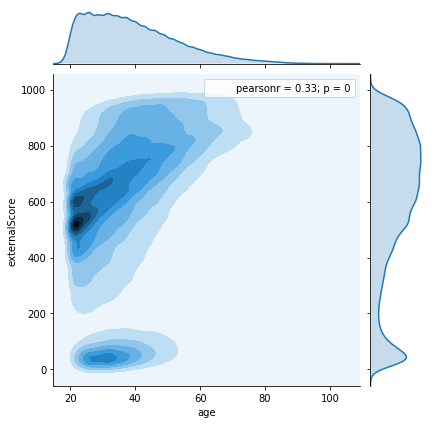

In [141]:
# jointplot
sns.jointplot(x="age", y="externalScore", data=train, kind="kde");

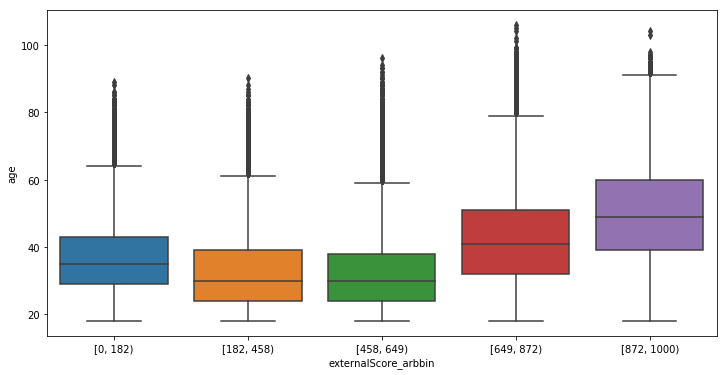

In [142]:
# boxplot with bins
plt.figure(figsize=(12, 6))
sns.boxplot(x="externalScore_arbbin", y="age", data=train);

#### Age vs indSimin

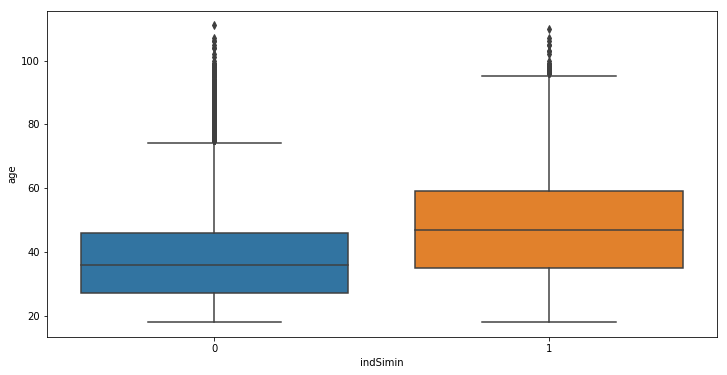

In [143]:
# boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="indSimin", y="age", data=train);

#### Age vs Salary

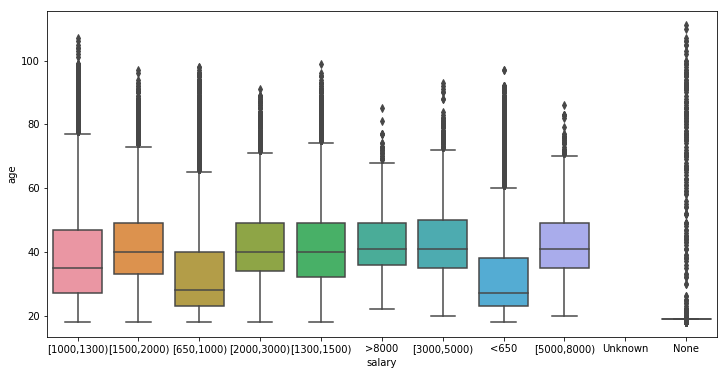

In [144]:
# boxplot -> a lot of outliers and bad grouping
plt.figure(figsize=(12, 6))
sns.boxplot(x="salary", y="age", data=train);

#### Age vs Status

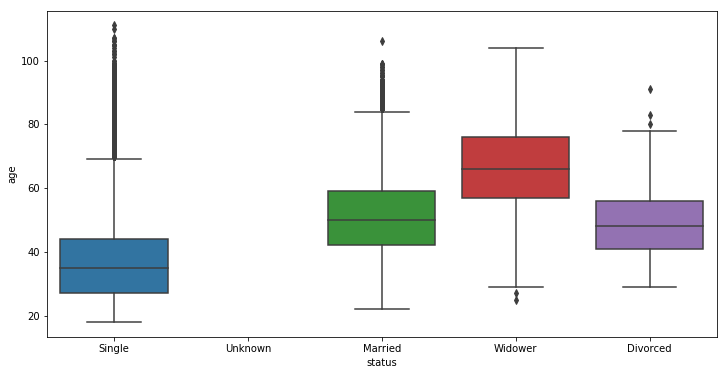

In [145]:
# boxplot -> some difference between statuses
plt.figure(figsize=(12, 6))
sns.boxplot(x="status", y="age", data=train);

#### Age vs Channel

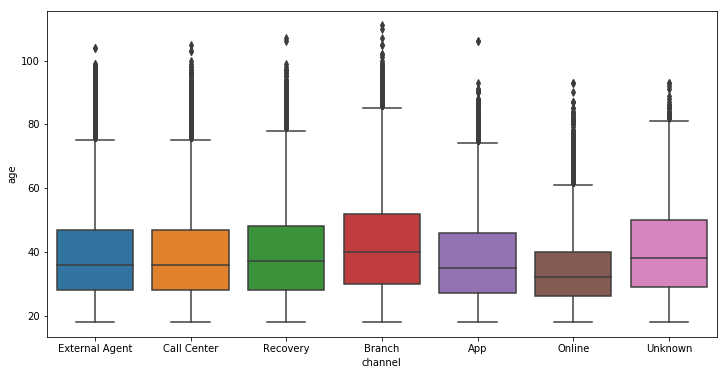

In [146]:
# boxplot -> not great differences
plt.figure(figsize=(12, 6))
sns.boxplot(x="channel", y="age", data=train);

### ExternalScore

#### ExternalScore vs indSimin

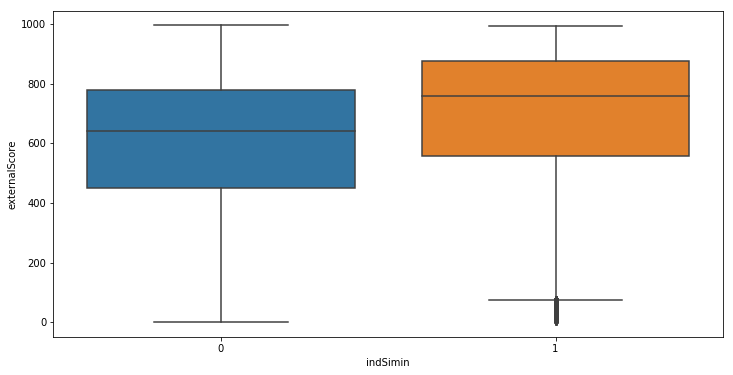

In [147]:
# boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="indSimin", y="externalScore", data=train);

#### ExternalScore vs Salary

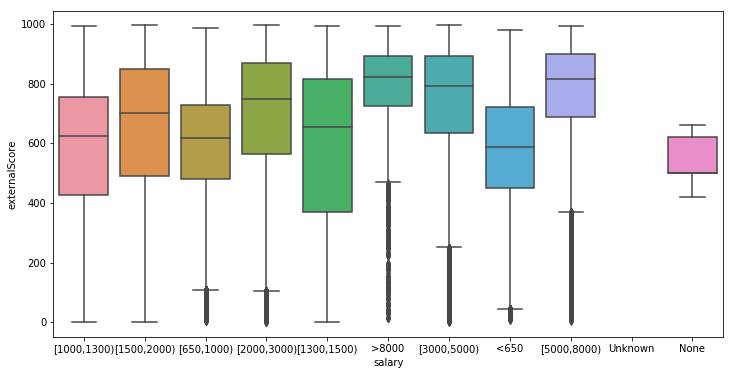

In [148]:
# boxplot -> a lot of outliers and bad grouping
plt.figure(figsize=(12, 6))
sns.boxplot(x="salary", y="externalScore", data=train);

#### ExternalScore vs Status

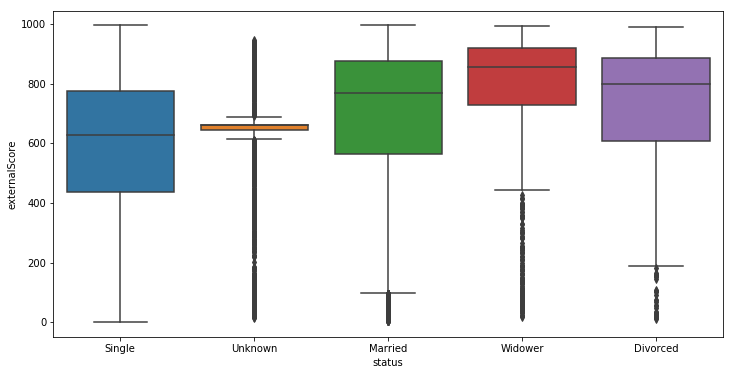

In [149]:
# boxplot -> some difference between statuses
plt.figure(figsize=(12, 6))
sns.boxplot(x="status", y="externalScore", data=train);

#### ExternalScore vs Channel

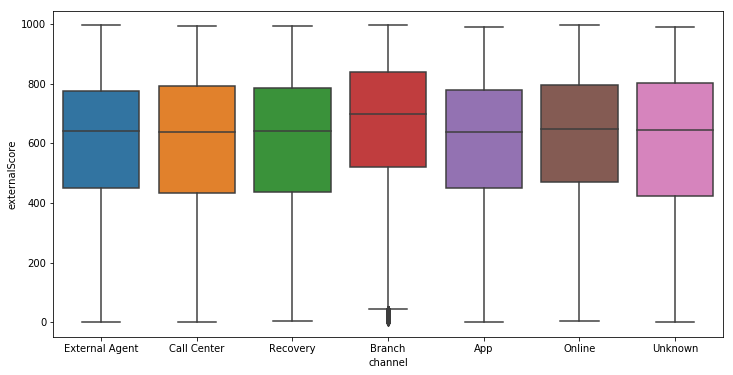

In [150]:
# boxplot -> not great differences
plt.figure(figsize=(12, 6))
sns.boxplot(x="channel", y="externalScore", data=train);

## 4. Baseline Model
We will try these different models as baseline:
- Logistic Regression
- Naive Bayes
- LGBM
- RF
- SVM 
- KNN

### Basic Null Imputation
In the first round we will only employ a simple null imputation to be able to create a baseline model reuslt. This will include mean/median for numerical variables and 'unkown' for categorical features.

In [151]:
# NaN summary as % of all data
round(all_data.isnull().sum() / len(train), 3)

age                   0.058
channel               0.000
externalScore         0.021
indBadDebt            0.000
indBadLocation        0.000
indCreditBureau       0.000
indInternet           0.000
indSimin              0.000
indXlist              0.000
numLoans              0.652
numMortgages          0.652
previous              0.000
salary                0.000
sex                   0.000
status                0.000
sumExternalDefault    0.007
target                0.333
dtype: float64

In [152]:
# NaN summary absolute of all data
all_data.isnull().sum()

age                    30173
channel                    0
externalScore          11070
indBadDebt                 0
indBadLocation             0
indCreditBureau            0
indInternet                0
indSimin                   0
indXlist                   0
numLoans              340980
numMortgages          340980
previous                   0
salary                     0
sex                        0
status                     0
sumExternalDefault      3554
target                174313
dtype: int64

### <1% missing values

#### age = median imputation

In [153]:
# fill NaNs with mean 
all_data.age.fillna(all_data.age.median(), inplace=True)

#### externalScore = median imputation

In [154]:
# fill NaNs with mean 
all_data.externalScore.fillna(all_data.externalScore.median(), inplace=True)

#### sumExternalDefault

In [155]:
# fill NaNs with mean 
all_data.sumExternalDefault.fillna(all_data.sumExternalDefault.median(), inplace=True)

### >50% missing values = 'unknown' imputation

#### numLoans

In [156]:
# fill NaNs with mean 
all_data.numLoans.fillna('unknown', inplace=True)

#### numMortgages

In [157]:
# fill NaNs with mean 
all_data.numMortgages.fillna('unknown', inplace=True)

###  Data Preparation

In [158]:
# split data back to train and test 
train = all_data[:len(train)]
test = all_data[len(train):]

# extract target from training set
target = train.target

# drop target from training set
train.drop('target', axis=1, inplace=True)

# One-hot encoding: Create dummies for training data
train = pd.get_dummies(train)

# Convert to numpy arrays
target_np = np.array(target)
train_np = np.array(train)

# import necessary library
from sklearn.model_selection import train_test_split

# split training data into training and validation data 80/20 split
x_train, x_validation, y_train, y_validation = \
    train_test_split(train_np, target_np, test_size=0.20, random_state=42)

### Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegressionCV

# define LR classifier
clf_lr = LogisticRegressionCV(cv=3, random_state=42, scoring='roc_auc')

# fit model
clf_lr.fit(x_train, y_train)

# make predictions with cross validation 
clf_lr_pred = clf_lr.predict_proba(x_validation)

In [167]:
from sklearn.metrics import classification_report

# classification report
#print(roc_curve(y_validation, clf_lr_pred))

### Naive Bayes

In [168]:
from sklearn.naive_bayes import MultinomialNB

# define nb classifier
clf_nb = MultinomialNB()

# fit model 
clf_nb.fit(x_train, y_train)

# make predictions
clf_nb_pred = clf_nb.predict_proba(x_validation)

In [170]:
# classification report
#print(classification_report(y_validation, clf_nb_pred))

### LGBM

In [171]:
import lightgbm as lgb

# define model
clf_lgbm = lgb.LGBMClassifier()

# fit model 
clf_lgbm.fit(x_train, y_train)

# predict
clf_lgbm_pred = clf_lgbm.predict_proba(x_validation)

In [177]:
roc_auc_score(y_validation, clf_lgbm.predict_proba(x_validation))

ValueError: bad input shape (104588, 2)

In [172]:
# classification report
#print(classification_report(y_validation, clf_lgbm_pred))

In [173]:
# Merge feature names and importance score into df
features_names = pd.DataFrame(train.columns)
feature_importance_score = pd.DataFrame(clf_lgbm.feature_importances_)
lgbm_feature_importance = pd.concat([features_names, feature_importance_score], axis=1)

# Assign columns names
new_cols = ['lgbm_feature', 'lgbm_importance']
lgbm_feature_importance.columns = new_cols

# Sort values by importance and show top 20
lgbm_feature_importance = lgbm_feature_importance.sort_values('lgbm_importance', ascending=False).head(20)
# insert ranking score
lgbm_feature_importance['rank'] = range(1, 21)
# set rank as index
lgbm_feature_importance.set_index('rank', inplace=True)

lgbm_feature_importance

,lgbm_feature,lgbm_importance
rank,,
1,externalScore,503
2,age,445
3,sumExternalDefault,272
4,indSimin,94
5,"salary_[650,1000)",88
6,channel_Branch,83
7,previous_Normal,81
8,salary_<650,75
9,previous_Refinancing,73


### RandomForest

In [174]:
from sklearn.ensemble import RandomForestClassifier

# define model
clf_rf = RandomForestClassifier()

# fit model 
clf_rf.fit(x_train, y_train)

# predict
clf_rf_pred = clf_rf.predict_proba(x_validation)

In [ ]:
# classification report
#print(classification_report(y_validation, clf_rf_pred))

### Linear SVM

In [175]:
from sklearn.svm import LinearSVC

# define model
clf_svm = LinearSVC()

# fit model
clf_svm.fit(x_train, y_train)

# predict
clf_svm_pred = clf_svm.predict(x_validation)

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [ ]:
# classification report
#print(classification_report(y_validation, clf_svm_pred))

### ROC/AUC Evaluation
- Linear SVM can't perform a probability prediction, thus we exclude it from our overall evaluation.

In [176]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score

# define list with trained models and labels
models = [clf_lr, clf_nb, clf_lgbm, clf_rf]
labels = ['LogisticRegression', 'NaiveBayes', 'LGBM', 'RF']

# calc roc for each model 
for m, l in zip(models, labels):
    logit_roc_auc = roc_auc_score(y_validation, m.predict_proba(x_validation))
    fpr, tpr, thresholds = roc_curve(y_validation, m.predict_proba(x_validation)[:,1])
    plt.plot(fpr, tpr, label='%s (area = %0.3f)' % (l, logit_roc_auc))

# plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


ValueError: bad input shape (104588, 2)

#### Conclusion 
- LGBM:
    - best average score 68% / AUC 0.62
    - best classifier for customers with no outstanding cc fees
    - 0: 72%, 1: 61%
- LR:
    - scond best average 67% / AUC 0.60
    - 0: 71%, 1: 60%
- NB
    - average 63% / AUC 0.55
    - 0: 69%, 1: 52%
- RF:
    - average 63% / AUC 0.58
    - 0: 71%, 0: 49%
- SVM
    - Best at classifing customers with outstanding CC fees. Perhpas with some modifications we can increase the no CC fees classifcations or stack it with another model.
    - 0: 68%, 1: 62%
    
#### Notes
The LGBM model allows us to extract its feature importance. Above we see the top20 order whereby we can derive that externalScore, Age and sumExternalDeafualt are by far the most important features for this specific model. These features include null values. If we beleive this model, we should try to find a good way to impute these values, or perhaps remove rows with null values given its relatively low size. 
